# Proper SNR estimation

We first load the data using the `Study` class

In [1]:
from megfractal.subject import Study

subjects = ['eb180237']
run_extension = [('Run02', 'filtered_ica_sss_raw'), ('ER', 'MF_sss_raw')]

S = Study.from_files('ScaledTime', subjects, run_extension)

Opening raw data file /media/merlin/Media/ScaledTime/MEG/eb180237/eb180237_ScaledTime_Run02_filtered_ica_sss_raw.fif...
    Range : 100500 ... 1672499 =     50.250 ...   836.250 secs
Ready.
Opening raw data file /media/merlin/Media/ScaledTime/MEG/eb180237/eb180237_ScaledTime_Run02_filtered_ica_sss_raw-1.fif...
    Range : 1672500 ... 2321999 =    836.250 ...  1160.999 secs
Ready.
Current compensation grade : 0
Converting "time" to "<class 'numpy.int64'>"...
Opening raw data file /media/merlin/Media/ScaledTime/MEG/eb180237/eb180237_ScaledTime_ER_MF_sss_raw.fif...
    Range : 117000 ... 464999 =     58.500 ...   232.500 secs
Ready.
Current compensation grade : 0
Converting "time" to "<class 'numpy.int64'>"...
Opening raw data file /media/merlin/Media/ScaledTime/MEG/eb180237/eb180237_ScaledTime_ER_MF_sss_raw.fif...
    Range : 117000 ... 464999 =     58.500 ...   232.500 secs
Ready.
Current compensation grade : 0
Converting "time" to "<class 'numpy.int64'>"...
incorrect


SNR estimation in `megfractal` is performed using the empty room recording signal power as a reference, with the following formula

$$\textrm{SNR} = 10 \left( \log_{10} \left(\overline{P}\right) - \log_{10} \left(\overline{P_{ER}}\right)\right)$$

with $\overline{P} = \sum_{f \in f_{band}} \Gamma (f)$ and $\overline{P_{ER}} = \sum_{f \in f_{band}} \Gamma_{ER} (f)$,

where $\Gamma (f)$ is the estimated Power Density Spectrum (PSD) of the signal
and $\Gamma_{ER} (f)$ the estimated PSD of the Empty Room recording,
and $f_{band}$ the specified frequency band

<div class="alert alert-info">

**Note:**

This estimation is approximate, as it uses the empty room recording to estimate the sensor noise power levels,
as it is not possible to know these noise levels during recordings where a subject is present
    
</div>

In [2]:
SNR = S.runs['Run02-p1']['eb180237'].compute_SNR(S.runs['ER']['eb180237'], freq_band=(0.01, 2))

The `compute_SNR` functions returns an estimate for each sensor, for which we can show the distribution

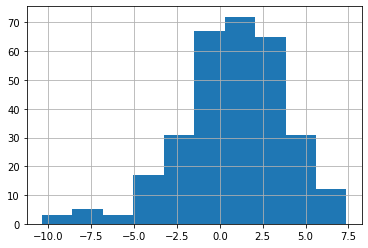

In [3]:
SNR.hist()

We can use the average to give an idea of the global quality of the recording

In [4]:
SNR.mean()

0.7617525953021228

Since the output of `compute_SNR` is in dB, we can get a linear value by performing a simple transform:

In [5]:
10 ** (SNR.mean() / 10)

1.1917228307293521